In [1]:
import warnings

warnings.simplefilter("ignore", FutureWarning)

import spatialdata as sd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import anndata as ad


/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "fig4"
sc.settings.set_figure_params(dpi=50, dpi_save=300, facecolor="white", frameon=False, figsize=(8,8),
                                   vector_friendly=True
                             )


# Load

In [3]:
adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered.scrna')
import gc
gc.collect()

adata.obs["lvl5_annotation_new"]=adata.obs["lvl5_annotation"]

 

In [4]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)


In [9]:
cell_types = [
    "cDC1",
    "Mac2",
    "T",
    "Pericyte1",
    "Ve3_Ven",
    "Plasma cell",
    #"Bcell",
    "F3: FRC-like",
    "VE1_Art",'VE3_Ven',
    "VE4_Cap",
   # 'mSchwann',
    #'nmSchwann',
    "F2/3: Perivascular"
]
adata=adata[(adata.obs["lvl5_annotation"].isin(cell_types))|
           (adata.obs["lvl5_annotation"].str.startswith("Sweat"))
           ].copy()


In [10]:
import gc
gc.collect()

837

In [11]:
ORDER = [


 'Plasma cell',
 'Sweat gland Myoepithelial',
         'Sweat gland',
          'Sweat gland channel outer',
 'Sweat gland channel inner',
 'VE1_Art','VE3_Ven',
 'VE4_Cap',
    'Mac2',
 'T',

 'cDC1',
'F3: FRC-like', "F2/3: Perivascular", 'Pericyte1', 
    
    # 'mSchwann',
   # 'nmSchwann',
]


/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


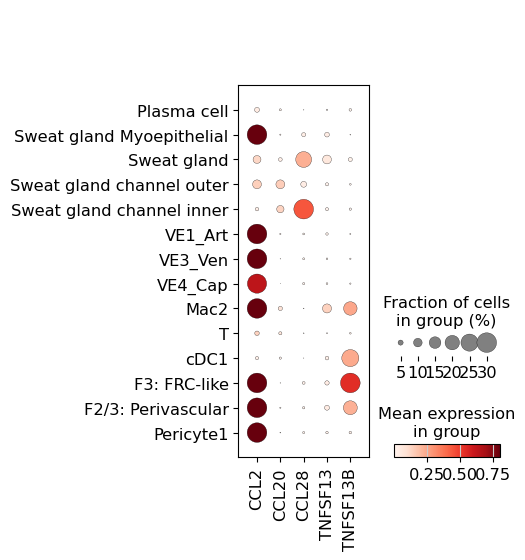

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


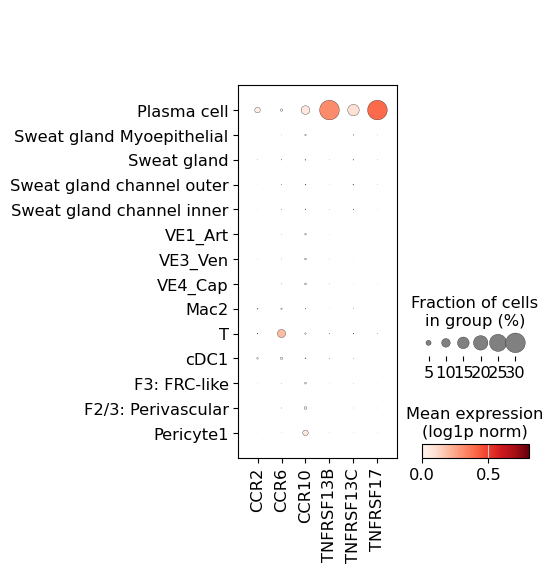

In [12]:
# adata_ii=adata[(adata.obs[CATEGORY]==("Treg"))|
#                (adata.obs[CATEGORY].str.startswith("Treg_LRRC32+"))|
#                 (adata.obs[CATEGORY].str.startswith("TR1"))
#                 ]
# #adata_iii=adata_ii[adata_ii.obs["disease_overall"]=="AD"]
# adata_5k_ii=adata_5k[(adata_5k.obs[CATEGORY]==("Treg"))|
#                (adata_5k.obs[CATEGORY].str.startswith("Treg_LRRC32+"))|
#                 (adata_5k.obs[CATEGORY].str.startswith("TR1"))
#                 ]


# adata_5k_ii=adata_5k_ii[adata_5k_ii.obs["Site_status"].isin(["Lesional", "Non-lesional"])]

# # for x in adata_5k_ii.obs["disease_overall"].unique():
# #     print(x)
# #     adata_5k_iii=adata_5k_ii[adata_5k_ii.obs["disease_overall"]==x]
# TREG_GENES =  { 'Treg': ['FOXP3', 'TIGIT',  "IL2RA",      'CTLA4',],
#          "Activated_Treg": ["LRRC32", "IL1R1",#"IL1R2", 
#                             "CCR8", #'TRAF3',  "ITGAV",
#                             #'CMSS1', 'LRRC32',
#                           #  'F5',# "TOX"
#                          #  'ZNF331', 'JMY', 'ELL2','NR4A3',
#                             'NR4A1',#'BICDL1',
#                            "STAT5A",

#                            ],
#               'TR1': [ #"CD69",
#                             #'IFIT3',
#                             #"SOCS1", 
#                             "CXCR3", 'EOMES', 'IL10', 'LAG3', 'HAVCR2', "PDCD1", 'FOXB1',
#          ]
#               }
# flat_gene_list = [gene for genes in TREG_GENES.values() for gene in genes]

# TREG_GENES = {
#     'Treg': ['FOXP3', 'TIGIT', "IL2RA", 'CTLA4'],
#     "Activated_Treg": ["LRRC32", "IL1R1", "CCR8", "ITGAV"],
#     "TR1": ["LAG3", "IL10", "MIR155HG", "HAVCR2"],
# }

#flat_gene_list = [gene for genes in TREG_GENES.values() for gene in genes]

# Create dotplot
# dp = sc.pl.DotPlot(
#     adata,
#      ["CCL2", "CCL20", "CCL28", 'TNFSF13', 'TNFSF13B'],
#     groupby="lvl5_annotation",
#     vmax=0.8,
#    # categories_order=["Treg", "Treg_LRRC32+", "TR1"]
# )

# # Style it
# dp = dp.style(
#     cmap='Reds',
#     color_on='square',
#     dot_edge_color='white',
#     dot_edge_lw=1,
#     grid=False,
#     dot_max=0.6,
#     categories_order=ORDER
# )

# # Save BEFORE showing
# dp.savefig("fig5/plasma_Cell_LIGAND.pdf", dpi=300)

# # Optionally display
# #dp.show()

sc.pl.dotplot(
    adata,
     ["CCL2", "CCL20", "CCL28", 'TNFSF13', 'TNFSF13B'],
    groupby="lvl5_annotation",
    vmax=0.8,
    categories_order=ORDER,
        dot_max=0.3,

    save='4h_plasma_Cell_dotplot1.pdf'
)

sc.pl.dotplot(
    adata,
       ["CCR2", "CCR6", "CCR10", 'TNFRSF13B', 'TNFRSF13C', 'TNFRSF17'],
    groupby="lvl5_annotation",
    vmax=0.8,
    dot_max=0.3,
    categories_order=ORDER,
    colorbar_title="Mean expression\n(log1p norm)",
    save='4h_plasma_Cell_dotplot2.pdf'
)

# dp = dp.style(
#     cmap='Reds',
#     color_on='square',
#     dot_edge_color='white',
#     dot_edge_lw=1,
#     grid=False,
#     dot_max=0.6,
#     categories_order=ORDER
# )

# dp.savefig("fig5/", dpi=300)

# #dp.show()
   

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


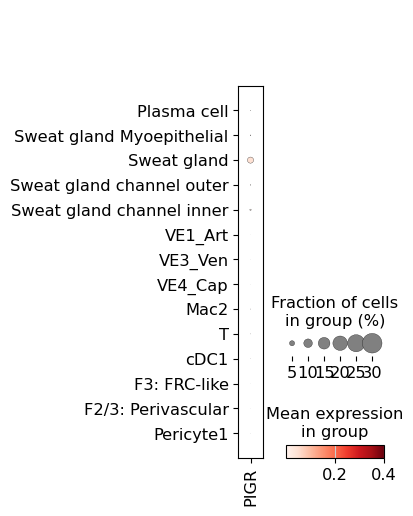

In [16]:
sc.pl.dotplot(
    adata,
     ["PIGR",],
    groupby="lvl5_annotation",
    vmax=0.4,
    categories_order=ORDER,
        dot_max=0.3,

    save='supp_plasma_Cell_PIGRscrna.pdf'
)


# xenium validation (sFig 16b)

In [ ]:
import scanpy as sc
adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered')
import gc
gc.collect()
adata=adata[adata.obs["tech"]=="xenium"]

def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata.var_names]
    return LIST

 

In [ ]:
import pandas as pd

subset = adata.obs[adata.obs["niche19"].str.startswith("Plasma")]
vc = subset["lvl5_annotation"].value_counts()
vc

In [ ]:
vc_filtered = vc[vc >= 10]

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

adata=adata[(adata.obs["niche19"].str.startswith("Plasma"))|
           (adata.obs["lvl5_annotation"].str.startswith("Sweat"))
           ]
adata=adata[(adata.obs["lvl5_annotation"].isin(vc_filtered.index.to_list()))
           |
           (adata.obs["lvl5_annotation"].str.startswith("Sweat"))].copy()
adata.obs["lvl5_annotation"].value_counts()


In [ ]:
sc.pl.dotplot(
    adata,
     remove_markers(["CCL2", "CCL20", "CCL28", 'TNFSF13', 'TNFSF13B']),
    groupby="lvl5_annotation",
    vmax=0.8,
    categories_order=ORDER,
        dot_max=0.3,

    save='supp16_plasma_Cell_dotplot1_XENIUM.pdf'
)

sc.pl.dotplot(
    adata,
       remove_markers(["CCR2", "CCR6", "CCR10", 'TNFRSF13B', 'TNFRSF13C', 'TNFRSF17']),
    groupby="lvl5_annotation",
    vmax=0.8,
    dot_max=0.3,
    categories_order=ORDER,
    colorbar_title="Mean expression\n(log1p norm)",
    save='supp16_plasma_Cell_dotplot2_XENIUM.pdf'
)

# dp = dp.style(
#     cmap='Reds',
#     color_on='square',
#     dot_edge_color='white',
#     dot_edge_lw=1,
#     grid=False,
#     dot_max=0.6,
#     categories_order=ORDER
# )

# dp.savefig("fig5/", dpi=300)

# #dp.show()
   

In [ ]:
# sc.pl.dotplot(
#     adata,
#      remove_markers(["PIGR",]),
#     groupby="lvl5_annotation",
#     vmax=0.8,
#     categories_order=ORDER,
#         dot_max=0.6,

#     save='4k_plasma_Cell_PIGRxenium.pdf'
# )


### 